As a discrete data $\{x_i\}_{i=1}^{I}$  where $x_i\in\{1,2,...6\}$  
$Pr(x=k|\lambda _1.._k) = \prod_{k=1}^{K}{\lambda_k^{x_k}} = \lambda_k$

$\hat{\lambda}=\underset{\lambda_1.._6}{argmax}\left [ \prod_{i=1}^{I}Pr(x_i|\lambda_1.._6)\right ] $
, subject to: $\underset{k}{\sum}\lambda_k=1$  
$=\underset{\lambda_1.._6}{argmax}\left [ \prod_{i=1}^{I}Pr(x_i|\lambda_1.._6)\right ] $  
$=\underset{\lambda_1.._6}{argmax}\left [ \prod_{k=1}^{K}{\lambda_k^{x_k}}\right ]$  

Similarly, it is easier to maximize the log probability, and we use the crierion:  
$L = \sum_{k=1}^{6}N_k\log{[\lambda_k]}+\nu\left(\sum_{k=1}^{6}\lambda_k-1\right)$   
We differentiate L with respect to $\lambda_k$ and $\nu$, set the derivatives equal to zero, and solve for $\lambda_k$ to obtain:  

$\frac{\delta L}{\delta\lambda_k}=\frac{N_k}{\lambda_k}+\nu$  
$\frac{\delta L}{\delta\nu}=\sum_{k=1}^{6}{\lambda_k-1}$  

$\left\{\begin{matrix}
&\frac{\delta L}{\delta\lambda_k}=0& \\
&\frac{\delta L}{\delta\nu}=0&
\end{matrix}\right.
$  

$\left\{\begin{matrix}
&\frac{N_k}{\lambda_k}+\nu=0& \\
&\sum_{k=1}^{6}{\lambda_k-1}=0&
\end{matrix}\right.
$  

$\left\{\begin{matrix}
&\frac{N_k}{\lambda_k}+\nu=0& \\
&\sum_{k=1}^{6}{\left(-\frac{N_k}{\nu}\right)}-1=0&
\end{matrix}\right.
$  

$\left\{\begin{matrix}
&\hat{\lambda_k}=\frac{N_k}{\sum_{k=1}^{6}N_k}& \\
&\nu=-\sum_{k=1}^{6}N_k&
\end{matrix} \right.
$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [2]:
original_probabilities = [0.25,0.15,0.1,0.1,0.15,0.25]
data = np.random.choice(np.arange(7)[1:], 1000, p=original_probabilities)
print(data)

[3 2 6 1 4 3 6 2 6 1 1 3 6 3 3 2 1 3 6 6 3 2 2 3 1 5 1 4 5 4 2 4 6 6 5 3 1
 5 6 6 3 2 6 6 5 2 6 3 4 3 5 6 6 6 2 3 2 2 1 6 2 1 5 3 1 1 3 6 5 1 2 2 1 4
 6 6 4 1 5 1 6 3 6 6 1 2 6 2 3 1 6 2 6 5 2 1 6 5 2 5 2 1 5 2 1 6 4 5 1 6 2
 4 5 2 1 1 6 2 6 1 1 2 3 3 1 6 6 6 1 5 5 6 1 1 2 1 1 2 1 5 2 5 1 6 5 6 2 6
 6 1 1 5 1 1 4 6 5 1 5 2 5 6 1 5 2 5 4 6 4 2 6 5 1 1 2 4 6 5 2 2 6 6 3 5 6
 1 2 1 6 5 3 3 1 1 2 6 5 5 6 6 1 4 1 6 6 4 6 2 2 3 2 2 2 1 2 4 5 5 1 4 5 1
 2 1 2 3 4 5 1 1 4 6 3 5 6 1 1 6 4 6 2 1 6 2 2 6 4 1 6 1 5 3 5 1 2 6 6 3 6
 4 2 1 4 6 6 2 1 6 1 2 1 5 1 6 6 6 1 2 1 4 1 1 5 6 6 1 4 5 5 6 2 1 2 6 1 6
 5 3 5 2 6 6 4 6 2 3 1 3 6 5 6 1 1 2 1 3 1 1 5 3 5 1 6 3 1 5 2 6 6 4 5 1 6
 4 2 6 1 5 1 5 4 4 3 3 5 1 3 2 1 4 1 4 6 6 5 6 2 5 1 2 2 6 1 4 5 6 3 6 1 5
 2 6 1 1 5 6 3 2 1 4 6 1 1 2 4 6 6 2 1 1 3 1 5 5 5 1 2 5 2 4 5 6 5 1 6 5 1
 6 2 1 1 2 4 2 3 6 1 2 4 6 2 1 1 1 2 1 1 6 2 3 2 1 6 1 3 4 1 3 5 3 2 6 5 6
 1 5 6 1 1 6 6 5 4 1 5 1 3 2 3 3 1 1 4 6 5 2 6 1 1 1 1 2 5 6 3 6 5 4 2 4 4
 5 5 3 1 1 6 6 6 3 5 2 5 

In [3]:
# Histogram of categorical distribution
x = np.histogram(data, bins=[1, 2, 3, 4, 5, 6, 7])
print(x[0])
print(x[1][:-1])

[241 158 104 106 144 247]
[1 2 3 4 5 6]


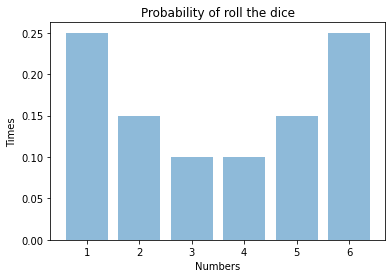

In [4]:
# plt.style.use('ggplot')
# plt.hist(data, bins=6, color = 'b')
histogram = x[0]
bins = x[1][:-1]
plt.bar(np.array(bins), np.array(original_probabilities), align='center', alpha=0.5)
plt.xlabel('Numbers')
plt.ylabel('Times')
plt.title('Probability of roll the dice')

plt.show()

In [5]:
def categoricalNorm(histogram, k):
    lambda_ = histogram[k]/sum(histogram)
    return lambda_

In [6]:
size = bins.size
lambdaList = np.zeros(size)
for idx in range(size):
    lambdaList[idx] = categoricalNorm(histogram,idx)

In [7]:
print('Maximum likelihood:', lambdaList)
print('Original:', original_probabilities)

Maximum likelihood: [0.241 0.158 0.104 0.106 0.144 0.247]
Original: [0.25, 0.15, 0.1, 0.1, 0.15, 0.25]


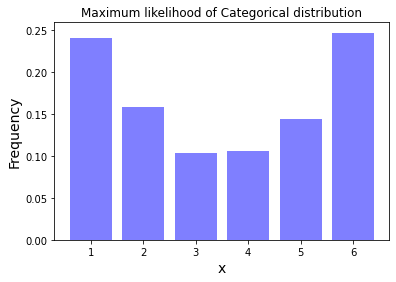

In [8]:
plt.bar(np.array(bins), np.array(lambdaList), align='center', alpha=0.5, color='b')
plt.xlabel('x', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Maximum likelihood of Categorical distribution')

plt.show()